## Arima Model

In this second part of the business case analysis I will perform another clustering technique over the average group of sales. Furthermore, I will apply an ARIMA model to follow trends over the purchases. 

In [2]:
import pandas as pd
from pandas import ExcelFile
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import itertools
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sys
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
import warnings
import statsmodels.api as sm

In [9]:
#recreating the dataset.
overallClusters = pd.read_csv('overallClustersV2.csv')
averageClusters = overallClusters.query('OverallClusters == 0') 
averageClusters

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Categorie,OverallClusters
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2.200000,0
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.333333,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0.200000,0
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1.166667,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.166667,0
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2.200000,0
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2.400000,0
7,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,0.500000,0
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,0.400000,0
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,1.250000,0


In [10]:
#Find new amount of clusters
newX = averageClusters.iloc[:,[10,9]].values
newX

array([[ 2.2       , 15.3       ],
       [ 2.33333333, 20.34      ],
       [ 0.2       , 22.        ],
       ...,
       [ 2.5       , 16.6       ],
       [ 1.25      , 16.6       ],
       [ 2.2       , 14.85      ]])

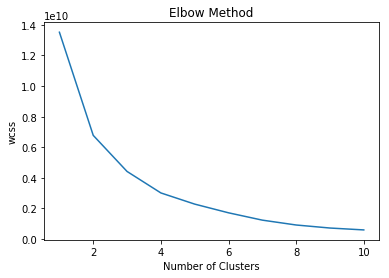

In [11]:
def generateElbow(X):
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss
newwcss = generateElbow(newX)
plt.plot(range(1,11), newwcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()
#According with the results 4 clusters are the choosen ones. 

In [12]:
#applying clusters with 4.
newkmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
newy_kmeans = newkmeans.fit_predict(newX)

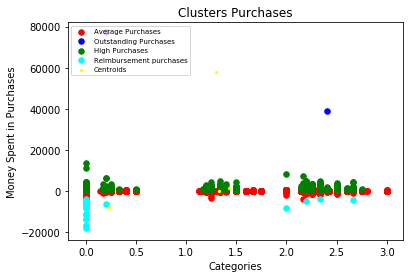

In [16]:
#visualizing the reuslts
plt.scatter(newX[newy_kmeans == 0, 0], newX[newy_kmeans == 0, 1], s = 30, c = 'red', label = 'Average Purchases')
plt.scatter(newX[newy_kmeans == 1, 0], newX[newy_kmeans == 1, 1], s = 30, c = 'blue', label = 'Outstanding Purchases')
plt.scatter(newX[newy_kmeans == 2, 0], newX[newy_kmeans == 2, 1], s = 30, c = 'green', label = 'High Purchases')
plt.scatter(newX[newy_kmeans == 3, 0], newX[newy_kmeans == 3, 1], s = 30, c = 'cyan', label = 'Reimbursement purchases')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'cluster 5')
plt.scatter(newkmeans.cluster_centers_[:,0], newkmeans.cluster_centers_[:,1], s=5, c='yellow', label='Centroids')
plt.title('Clusters Purchases')
plt.xlabel('Categories')
plt.ylabel('Money Spent in Purchases')
plt.legend(loc=2, prop={'size': 7})
plt.show()

The clustering algorithm from above shows a small outlier of outstanding purchases, average purchases and purchases slightly above average as almost equally. The group of negative purchases (reimbursements) is higher than the outstanding, here there is room for exploration of reasons why reimbursements were done, technical issues on the website or return of products. In the hipothetical situation  where we are in a company with a corresponding marketing team, will be possible to analyze how they are promoting the home accessories, since those are the ones that peole tend to buy the most. The clothes sector has opportunity of improvement in the marketing area. 

In [7]:
#Time Series Analysis. Visual  Inspection plot time series against amount of money spent throughout the year.
time_purchases = overallClusters[['InvoiceDate','TotalPrice']]


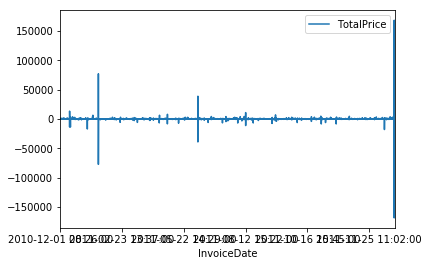

In [8]:
time_purchases.plot(x='InvoiceDate',y='TotalPrice',kind='line')

From the graph above it can be seen 5 outliers throughout the year. Furthermore, it seems to be clearly more activity on the second part of the year and the time-serie is clearly non-stationary. Next I am going to implement an ARIMA model over the purchases in the whole year.

In [9]:
time_purchases

,InvoiceDate,TotalPrice
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34
5,2010-12-01 08:26:00,15.30
6,2010-12-01 08:26:00,25.50
7,2010-12-01 08:28:00,11.10
8,2010-12-01 08:28:00,11.10
9,2010-12-01 08:34:00,54.08


/home/abi/network/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'Money')

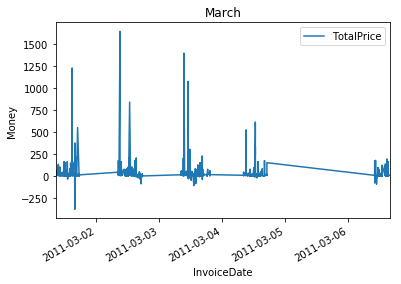

In [10]:
ts = pd.Timestamp
time_purchases['InvoiceDate'] = pd.to_datetime(time_purchases['InvoiceDate'])
purchasesMarch = time_purchases.query('InvoiceDate > @ts("20110301T000000") and InvoiceDate < @ts("20110307T000000")')
#print(df.query('date > @ts("20190515T071320")')
purchasesMarch.plot(x='InvoiceDate',y='TotalPrice',kind='line')
plt.title('March')
plt.ylabel('Money')

The graph from above demonstrate the behavior over time of the purchases during the first week of the month of march 2011.

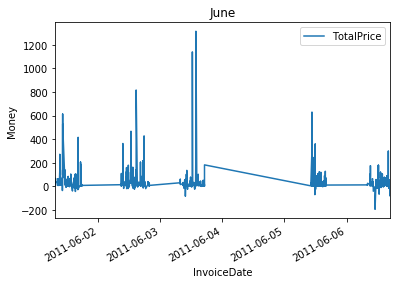

In [11]:
purchasesJune = time_purchases.query('InvoiceDate > @ts("20110601T000000") and InvoiceDate < @ts("20110607T000000")')
#print(df.query('date > @ts("20190515T071320")')
purchasesJune.plot(x='InvoiceDate',y='TotalPrice',kind='line')
plt.title('June')
plt.ylabel('Money')
purchasesJune = purchasesJune.set_index('InvoiceDate')

The graph from above demonstrates how the behavior of purchases turn out to be during the first week of the month of June 2011. 

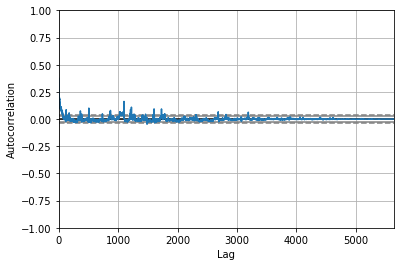

In [12]:
purchasesMarch = purchasesMarch.set_index('InvoiceDate')
autocorrelation_plot(purchasesMarch)

In [13]:
mean = purchasesJune.rolling(window=20).mean()
std = purchasesJune.rolling(window=20).std()

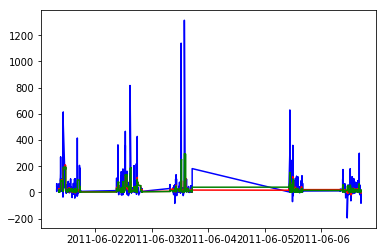

In [14]:
plt.plot(purchasesJune, color = 'blue', label = 'purchasesJune')
plt.plot(mean, color = 'red', label= 'meanJune')
plt.plot(std, color='green', label='standardDeviationJune')

The graph from above demonstrates the mean and standard deviation presented in a period of 20 transactions over time. Below I iterate several combinations of values to determine which will be the ARIMA model parameters, which will yield the least error.

In [15]:
#Selecting the ARIMA parameters.
warnings.filterwarnings("ignore")
p = d = q = range(0,5)
pdq = list(itertools.product(p,d,q))
results = []
#Generate all possible combination with a seasonal of 4 given that I am more interested in quarters of the year.
for param in pdq:
    try:
        model = ARIMA(purchasesMarch['TotalPrice'], order=param)
        model_fit = model.fit(disp=0)
        print('Arima{} - AIC:{}'.format(param, model_fit.aic))
        results.apppend('Arima{} - AIC:{}'.format(param, model_fit.aic))
    except:
        pass

Arima(0, 0, 0) - AIC:61005.6540126
Arima(0, 0, 1) - AIC:60419.3668321
Arima(0, 0, 2) - AIC:60172.1213047
Arima(0, 0, 3) - AIC:60019.5969552
Arima(0, 0, 4) - AIC:59945.3393925
Arima(0, 1, 0) - AIC:62256.4593497
Arima(0, 1, 1) - AIC:59837.7319563
Arima(0, 1, 2) - AIC:59761.0875228
Arima(0, 2, 0) - AIC:68264.4753388
Arima(0, 2, 1) - AIC:62257.048518
Arima(1, 0, 0) - AIC:60155.4363579
Arima(1, 0, 1) - AIC:59708.7447793
Arima(1, 0, 2) - AIC:59683.2907883
Arima(1, 0, 3) - AIC:59667.0503467
Arima(1, 0, 4) - AIC:59656.496434
Arima(1, 1, 0) - AIC:60951.4268156
Arima(1, 1, 1) - AIC:59742.7539092
Arima(1, 1, 2) - AIC:59689.7445277
Arima(1, 1, 3) - AIC:59680.3485541
Arima(1, 1, 4) - AIC:59664.1275702
Arima(1, 2, 0) - AIC:65146.8811662
Arima(2, 0, 0) - AIC:59910.4603883
Arima(2, 0, 1) - AIC:59677.0742924
Arima(2, 0, 2) - AIC:59656.1100933
Arima(2, 0, 3) - AIC:59656.8922595
Arima(2, 0, 4) - AIC:59656.7130825
Arima(2, 1, 0) - AIC:60504.6395514
Arima(2, 1, 1) - AIC:59704.7863441
Arima(2, 1, 2) - AIC:5

From the AIC parameter we can infer that the ARIMA model with p = 4, d = 1, q = 2 will be a good option. Due to the lowest AIC value.

In [19]:
#Applying ARIMA Model
x = purchasesMarch.values
size = int(len(x) * 0.7)
train, test = x[0:size], x[size:len(x)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(4,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=15.400582, expected=15.000000
predicted=15.813948, expected=15.800000
predicted=15.923585, expected=14.850000
predicted=15.677348, expected=25.200000
predicted=17.880376, expected=22.500000
predicted=18.564191, expected=19.800000
predicted=18.407170, expected=17.700000
predicted=17.558204, expected=23.400000
predicted=18.713632, expected=39.750000
predicted=22.904974, expected=39.750000
predicted=25.707019, expected=15.300000
predicted=21.637718, expected=15.300000
predicted=19.138435, expected=17.700000
predicted=18.569132, expected=19.500000
predicted=19.364594, expected=15.300000
predicted=18.462913, expected=17.700000
predicted=18.669806, expected=17.700000
predicted=18.486979, expected=19.900000
predicted=19.207906, expected=15.000000
predicted=18.154791, expected=67.500000
predicted=29.354441, expected=0.850000
predicted=21.228734, expected=5.040000
predicted=17.291759, expected=8.850000
predicted=14.542388, expected=7.950000
predicted=15.875531, expected=2.950000
predi

predicted=43.974197, expected=11.700000
predicted=40.884439, expected=12.500000
predicted=37.425982, expected=16.500000
predicted=37.027731, expected=19.800000
predicted=36.624121, expected=19.800000
predicted=36.648886, expected=16.500000
predicted=34.669327, expected=2.500000
predicted=30.337447, expected=1.700000
predicted=26.825478, expected=3.750000
predicted=25.484834, expected=3.750000
predicted=24.299378, expected=4.250000
predicted=23.526745, expected=4.250000
predicted=22.368323, expected=4.250000
predicted=21.518994, expected=10.650000
predicted=21.994043, expected=1.250000
predicted=19.795799, expected=2.500000
predicted=18.408039, expected=4.250000
predicted=17.618942, expected=4.250000
predicted=17.172499, expected=4.250000
predicted=16.459971, expected=1.950000
predicted=15.271571, expected=2.950000
predicted=14.505281, expected=3.300000
predicted=13.963790, expected=7.500000
predicted=14.451197, expected=2.950000
predicted=13.371153, expected=2.550000
predicted=12.46329

predicted=14.438909, expected=1.700000
predicted=12.042211, expected=4.200000
predicted=11.344495, expected=1.700000
predicted=10.401303, expected=1.650000
predicted=9.830504, expected=3.380000
predicted=9.861390, expected=3.380000
predicted=9.660066, expected=6.760000
predicted=10.297515, expected=0.210000
predicted=8.991793, expected=4.950000
predicted=9.251008, expected=10.900000
predicted=10.733013, expected=0.420000
predicted=9.066706, expected=1.680000
predicted=8.397143, expected=2.950000
predicted=8.261533, expected=1.650000
predicted=7.871480, expected=6.500000
predicted=8.767465, expected=3.300000
predicted=8.424243, expected=5.040000
predicted=8.562423, expected=5.040000
predicted=8.670594, expected=0.210000
predicted=7.492603, expected=1.250000
predicted=6.996615, expected=0.840000
predicted=6.849626, expected=1.250000
predicted=6.727180, expected=1.250000
predicted=6.694778, expected=3.300000
predicted=7.054976, expected=1.450000
predicted=6.683934, expected=2.500000
predi

predicted=20.133673, expected=15.900000
predicted=18.530723, expected=31.600000
predicted=21.851288, expected=29.700000
predicted=23.341553, expected=17.850000
predicted=21.379554, expected=35.400000
predicted=24.234834, expected=9.950000
predicted=20.041036, expected=19.800000
predicted=20.171878, expected=84.000000
predicted=35.236916, expected=10.200000
predicted=26.498630, expected=10.200000
predicted=21.670874, expected=15.300000
predicted=19.715920, expected=15.000000
predicted=19.674791, expected=10.400000
predicted=18.384701, expected=17.700000
predicted=19.094977, expected=10.200000
predicted=17.676669, expected=15.000000
predicted=17.945775, expected=12.500000
predicted=17.308255, expected=10.200000
predicted=16.424746, expected=15.000000
predicted=16.829638, expected=12.500000
predicted=16.534908, expected=10.200000
predicted=15.694153, expected=0.000000
predicted=12.714620, expected=1.660000
predicted=11.410473, expected=8.290000
predicted=12.169433, expected=16.580000
pred

predicted=23.709675, expected=54.080000
predicted=28.306609, expected=60.000000
predicted=32.238768, expected=51.000000
predicted=32.855665, expected=39.800000
predicted=31.223203, expected=51.000000
predicted=32.911218, expected=8.250000
predicted=24.818759, expected=152.640000
predicted=54.106477, expected=9.900000
predicted=37.346837, expected=9.300000
predicted=28.631582, expected=24.750000
predicted=26.479653, expected=19.800000
predicted=25.502172, expected=9.300000
predicted=22.774210, expected=10.200000
predicted=20.790479, expected=15.000000
predicted=20.843018, expected=35.400000
predicted=25.447847, expected=35.400000
predicted=27.811041, expected=17.850000
predicted=24.740799, expected=175.200000
predicted=59.392354, expected=14.750000
predicted=41.500189, expected=23.800000
predicted=34.156094, expected=45.000000
predicted=33.775557, expected=34.000000
predicted=33.393409, expected=-76.650000
predicted=6.315250, expected=-4.950000
predicted=8.123825, expected=-53.100000
pr

predicted=9.459969, expected=4.950000
predicted=8.911124, expected=68.000000
predicted=23.088190, expected=45.000000
predicted=25.738893, expected=19.800000
predicted=21.668235, expected=30.600000
predicted=21.212419, expected=30.600000
predicted=21.885566, expected=55.800000
predicted=28.750541, expected=30.000000
predicted=26.601686, expected=4.950000
predicted=19.466817, expected=3.750000
predicted=15.338063, expected=0.840000
predicted=13.069387, expected=1.450000
predicted=12.220879, expected=1.450000
predicted=11.210602, expected=1.250000
predicted=10.603485, expected=2.950000
predicted=10.397595, expected=2.550000
predicted=9.883874, expected=1.450000
predicted=9.288000, expected=1.450000
predicted=8.709632, expected=1.250000
predicted=8.228514, expected=0.850000
predicted=7.778820, expected=1.250000
predicted=7.400580, expected=0.840000
predicted=7.030141, expected=8.850000
predicted=8.633198, expected=2.550000
predicted=7.955467, expected=2.100000
predicted=7.343705, expected=

predicted=4.846702, expected=1.250000
predicted=4.776751, expected=0.190000
predicted=4.442919, expected=1.250000
predicted=4.545605, expected=0.840000
predicted=4.438393, expected=0.650000
predicted=4.311989, expected=1.250000
predicted=4.295322, expected=0.850000
predicted=4.313219, expected=0.950000
predicted=4.181224, expected=1.250000
predicted=4.267822, expected=1.650000
predicted=4.371796, expected=1.250000
predicted=4.264537, expected=1.250000
predicted=4.206627, expected=5.950000
predicted=5.399767, expected=5.450000
predicted=5.757494, expected=4.950000
predicted=6.033163, expected=3.750000
predicted=5.750170, expected=1.300000
predicted=4.984910, expected=1.300000
predicted=4.798326, expected=1.300000
predicted=4.701057, expected=1.300000
predicted=4.613903, expected=7.950000
predicted=6.119678, expected=4.950000
predicted=6.165828, expected=8.500000
predicted=6.941577, expected=2.550000
predicted=6.160704, expected=3.450000
predicted=5.927667, expected=7.900000
predicted=6.

predicted=14.105648, expected=7.500000
predicted=12.904233, expected=5.900000
predicted=11.834014, expected=23.800000
predicted=15.329576, expected=5.900000
predicted=13.117754, expected=13.000000
predicted=13.456794, expected=6.300000
predicted=11.832805, expected=3.400000
predicted=10.506570, expected=2.500000
predicted=9.404673, expected=2.980000
predicted=8.866623, expected=9.900000
predicted=10.183426, expected=19.900000
predicted=13.119374, expected=10.200000
predicted=12.379678, expected=4.950000
predicted=10.658957, expected=17.000000
predicted=12.372185, expected=9.900000
predicted=11.848564, expected=15.000000
predicted=12.828458, expected=2.550000
predicted=10.237287, expected=8.850000
predicted=10.389115, expected=5.900000
predicted=9.810214, expected=19.800000
predicted=12.813211, expected=5.900000
predicted=11.064931, expected=19.900000
predicted=13.396874, expected=7.500000
predicted=11.672237, expected=29.700000
predicted=16.128178, expected=4.250000
predicted=12.477582

predicted=7.909971, expected=8.850000
predicted=8.378236, expected=13.520000
predicted=9.884932, expected=20.650000
predicted=12.435976, expected=3.300000
predicted=9.723699, expected=15.300000
predicted=11.051359, expected=9.950000
predicted=10.716284, expected=7.950000


Test MSE: 599.832


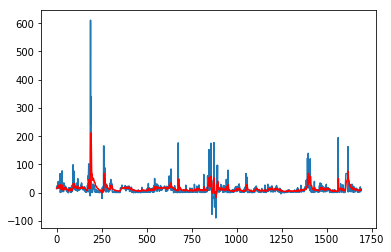

In [21]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predictions, color = 'red')
plt.show()

The graph from above represent the overall behavior of predictions made on the month of March with its corresponding error. The blue line represents purchases made by custoemr and the red line represent the predictions of the purchases behavior made by the ARIMA model.

In [58]:
flat_pred = list(itertools.chain(*predictions))
data_test = pd.DataFrame({'test_march': list(itertools.chain(*test)), 'pred_march': flat_pred})

In [59]:
data_test

,pred_march,test_march
0,15.400582,15.00
1,15.813948,15.80
2,15.923585,14.85
3,15.677348,25.20
4,17.880376,22.50
5,18.564191,19.80
6,18.407170,17.70
7,17.558204,23.40
8,18.713632,39.75
9,22.904974,39.75


In [78]:
size = int(len(purchasesMarch) * 0.7)
overallClusters['InvoiceDate'] = pd.to_datetime(overallClusters['InvoiceDate'])
purchasesMarch = overallClusters.query('InvoiceDate > @ts("20110301T000000") and InvoiceDate < @ts("20110307T000000")')
train, test = purchasesMarch[0:size], purchasesMarch[size:len(purchasesMarch)]
test['pred'] = data_test['pred_march'].values
test.to_csv('pred_march.csv')

To finish I store the data to be use in another visualization tool such as Tableau or Power BI.